In [1]:
%matplotlib inline
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import math 
from scipy import misc

In [2]:
K = np.array([-1.00, -1.6567, 18.6854, 3.4594]).reshape((4,1))
P = np.array([[1.55671002515707, 1.20667305121226, -3.45943817580002, -0.702669220484905],
[1.20667305121226,1.45543614041919, -4.68267286919406,-0.946650661702234],
[-3.45943817580002,-4.68267286919406,31.6320495422313,5.98385624609127],
[-0.702669220484905,-0.946650661702234,5.98385624609127,1.13973666335690]])

In [3]:
print(K)

[[-1.    ]
 [-1.6567]
 [18.6854]
 [ 3.4594]]


In [4]:
print(P)

[[ 1.55671003  1.20667305 -3.45943818 -0.70266922]
 [ 1.20667305  1.45543614 -4.68267287 -0.94665066]
 [-3.45943818 -4.68267287 31.63204954  5.98385625]
 [-0.70266922 -0.94665066  5.98385625  1.13973666]]


In [5]:
X = np.linspace(-0.2, 0.2, 50)
X_dot = np.linspace(-0.2, 0.2, 50)
Theta = np.linspace(-0.2, 0.2, 50)
Theta_dot = np.linspace(-0.6, 0.6, 50)

In [6]:
inside_ellipse = []
for x in X:
    for x_dot in X_dot:
        for theta in Theta:
            for theta_dot in Theta_dot:
                state = np.array([x, x_dot, theta, theta_dot])
                if(np.matmul(np.matmul(state.T, P), state) < 0.0005):
                    inside_ellipse.append([x, x_dot, theta, theta_dot])
                    
    

In [7]:
print(len(inside_ellipse))

466


In [8]:
np_inside_ellipse = np.array(inside_ellipse)

In [9]:
print(np_inside_ellipse)

[[-0.02857143  0.02857143 -0.02040816  0.11020408]
 [-0.02857143  0.02857143  0.00408163 -0.0122449 ]
 [-0.02857143  0.03673469 -0.02857143  0.15918367]
 ...
 [ 0.02857143 -0.03673469  0.02857143 -0.15918367]
 [ 0.02857143 -0.02857143 -0.00408163  0.0122449 ]
 [ 0.02857143 -0.02857143  0.02040816 -0.11020408]]


In [10]:
print(np.min(np_inside_ellipse, axis = 0))
print(np.max(np_inside_ellipse, axis = 0))

[-0.02857143 -0.04489796 -0.06938776 -0.37959184]
[0.02857143 0.04489796 0.06938776 0.37959184]


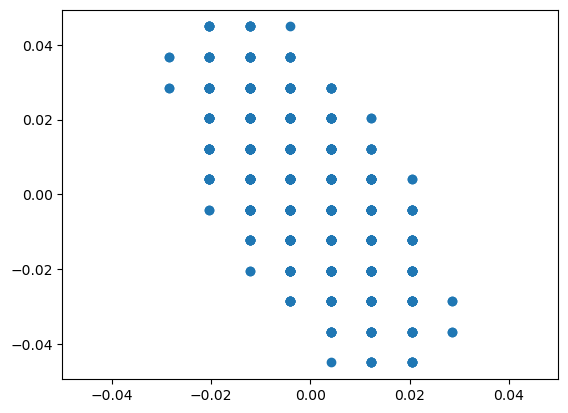

In [11]:
fig = plt.figure()
# Set the figure size
plt.rcParams["figure.autolayout"] = True

# Random data of 100×3 dimension

# Scatter plot
plt.scatter(np_inside_ellipse[:, 0], np_inside_ellipse[:, 1])
plt.xlim([-0.05, 0.05])
# Display the plot
plt.show()

In [12]:
def generate_grid(num):
    m = np.arange(-num, num+1)
    grid = []
    for num1 in m:
        for num2 in m:
            for num3 in m:
                for num4 in m:
                    grid.append([num1, num2, num3, num4])
    return np.array(grid)

def quasi_interpolant(coord, K, D, h):
    # Inputs the values of x, y and gives the infinite sum of the series
    grid = generate_grid(10)
    sum = 0 

    for point in grid:
      exponent = -np.linalg.norm(coord - h*point)**2/(D*h**2)
      sum += (np.matmul(coord, K)) * math.exp(exponent) / (math.pi * D * math.pi * D)
    return sum

In [13]:
quasi_interpolant(np_inside_ellipse[3], K, 5, 0.1)

array([0.01852612])

In [14]:
actual_feedback = (np.matmul(np_inside_ellipse, K))
quasi_feedback = np.loadtxt("4d_quasi_feedback.txt")

In [ ]:
!mkdir Backup

In [ ]:
quasi_feedback = np.array([quasi_interpolant(np_inside_ellipse[0], K, 5, 0.1)])
for i, coord in enumerate(np_inside_ellipse[1:]):
  quasi_feedback = np.vstack([quasi_feedback, quasi_interpolant(coord, K, 5, 0.1)])
  file_name = "/content/Backup" + str(i+2) + ".txt"
  np.savetxt(file_name, quasi_feedback)

In [15]:
print(quasi_feedback)

[-1.88575510e-02  1.51440816e-02 -1.54755101e-02  1.85261224e-02
  1.03587755e-02 -6.54734673e-03 -2.02608163e-02 -3.71669388e-02
 -5.40730612e-02  3.06469388e-02  1.37408163e-02 -3.16530611e-03
 -2.00714279e-02  2.73469388e-05 -1.68787755e-02 -3.37848980e-02
 -5.06910204e-02  3.40289796e-02  1.71228571e-02  2.16734694e-04
 -1.66893877e-02  3.40938774e-03 -1.34967347e-02 -3.04028571e-02
 -4.73089796e-02  3.74110204e-02  2.05048980e-02  3.59877551e-03
 -1.33073469e-02  6.79142835e-03 -1.01146938e-02 -2.70208163e-02
 -4.39269388e-02  4.07930612e-02  2.38869388e-02  6.98081633e-03
 -9.92530612e-03  1.01734676e-02 -6.73265285e-03 -2.36387754e-02
  4.41751019e-02  2.72689796e-02  1.03628571e-02  1.35554983e-02
 -3.35061166e-03 -2.02567340e-02  4.75571422e-02  3.06510203e-02
 -4.56857063e-03 -2.14746751e-02 -1.82820408e-02 -3.51881633e-02
 -5.20942856e-02  1.57195918e-02 -1.18653057e-03 -1.80926499e-02
  2.00612245e-03 -1.49000000e-02 -3.18061224e-02 -4.87122449e-02
  3.60077551e-02 -6.56183

In [16]:
print(quasi_feedback.shape)
print(actual_feedback.shape)

(466,)
(466, 1)


In [ ]:
np.savetxt("4d_quasi_feedback.txt", quasi_feedback)

0.04489795918367348 -0.04489795918367345
0.3795918367346939 -0.3795918367346939


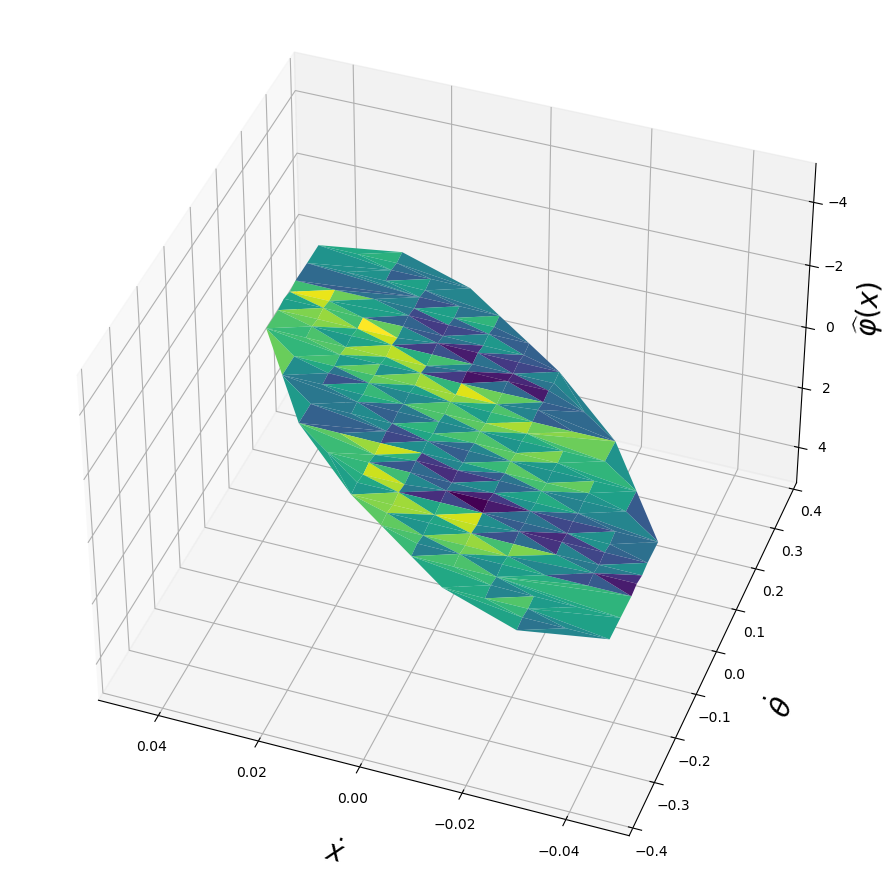

In [43]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.rcParams["figure.figsize"] = [9.0, 9.0]
# plotting the points
ax.plot_trisurf(np_inside_ellipse[:, 1],np_inside_ellipse[:, 3], quasi_feedback, cmap='viridis', edgecolor='none')
print(np.max(np_inside_ellipse[:, 1]), np.min(np_inside_ellipse[:, 1]))
print(np.max(np_inside_ellipse[:, 3]), np.min(np_inside_ellipse[:, 3]))
ax.set_zlabel(r'$\widehat{\varphi}(x)$', rotation = 0, fontsize = 40, labelpad = 10)
ax.set_xlabel(r'$\dot{x}$', fontsize = 40,labelpad=20)
ax.set_ylabel(r'$\dot{\theta}$', fontsize = 40,labelpad= 20)

ax.view_init(-140, 60)
ax.set_xlim(-0.05, 0.05)
ax.set_ylim(-0.4, 0.4)
ax.set_zlim(-5, 5)
plt.savefig('quasi_feedback_1.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.02857142857142858 -0.06938775510204082
0.02857142857142858 -0.06938775510204082


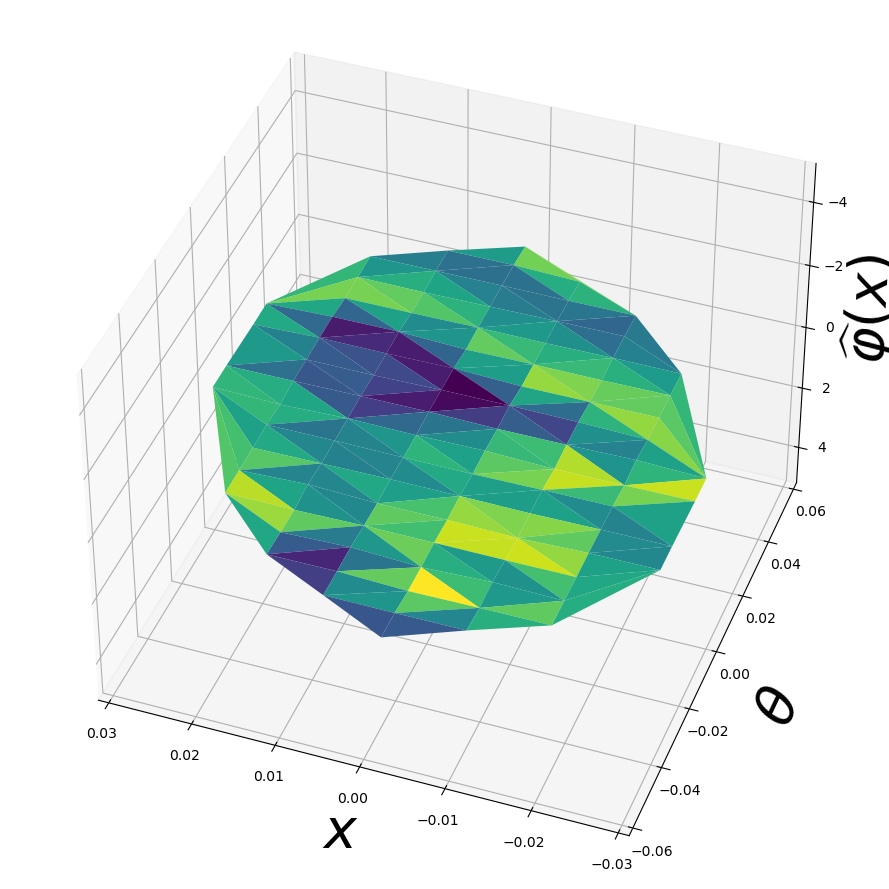

In [30]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.rcParams["figure.figsize"] = [9.0, 9.0]
# plotting the points
ax.plot_trisurf(np_inside_ellipse[:, 0],np_inside_ellipse[:, 2], quasi_feedback, cmap='viridis', edgecolor='none')
print(np.max(np_inside_ellipse[:, 0]), np.min(np_inside_ellipse[:, 2]))
print(np.max(np_inside_ellipse[:, 0]), np.min(np_inside_ellipse[:, 2]))
ax.set_zlabel(r'$\widehat{\varphi}(x)$', rotation = 0, fontsize = 40, labelpad = 10)
ax.set_xlabel(r'$x$', fontsize = 40,labelpad=10)
ax.set_ylabel(r'$\theta$', fontsize = 40,labelpad= 20)

ax.view_init(-140, 70)
ax.set_xlim(-0.03, 0.03)
ax.set_ylim(-0.06, 0.06)
ax.set_zlim(-5, 5)
plt.savefig('quasi_feedback_2.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.04489795918367348 -0.04489795918367345
0.3795918367346939 -0.3795918367346939


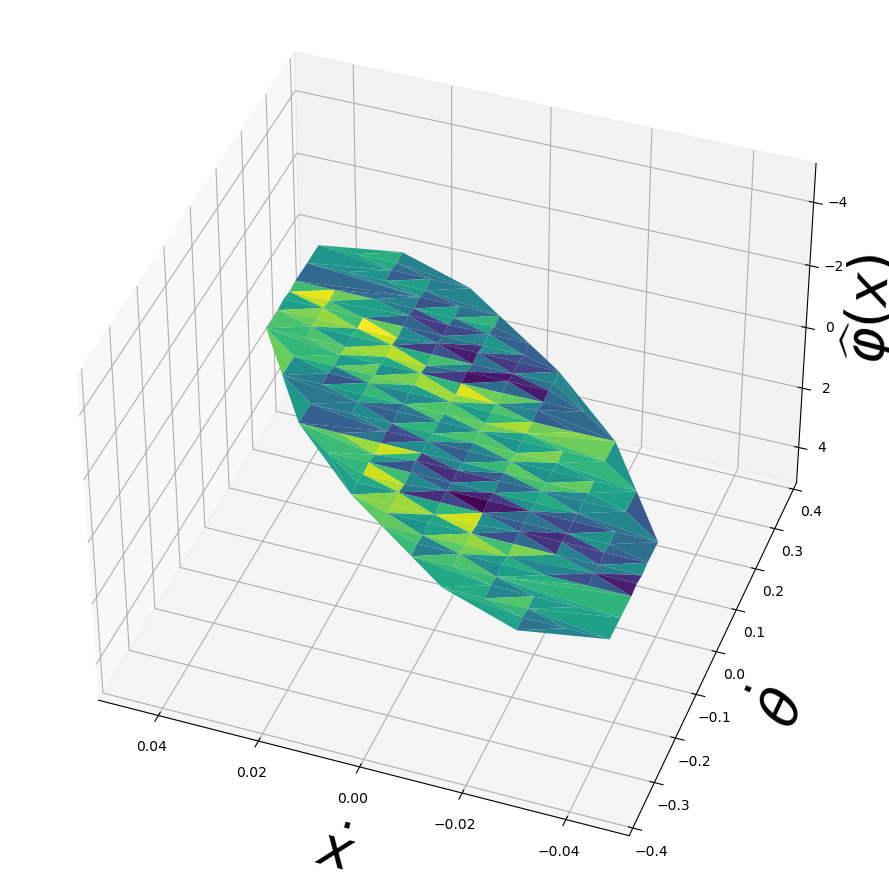

In [31]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.rcParams["figure.figsize"] = [9.0, 9.0]
# plotting the points
ax.plot_trisurf(np_inside_ellipse[:, 1],np_inside_ellipse[:, 3], actual_feedback.reshape(np_inside_ellipse[:, 1].shape), cmap='viridis', edgecolor='none')
print(np.max(np_inside_ellipse[:, 1]), np.min(np_inside_ellipse[:, 1]))
print(np.max(np_inside_ellipse[:, 3]), np.min(np_inside_ellipse[:, 3]))
ax.set_zlabel(r'$\widehat{\varphi}(x)$', rotation = 0, fontsize = 40, labelpad = 10)
ax.set_xlabel(r'$\dot{x}$', fontsize = 40,labelpad=20)
ax.set_ylabel(r'$\dot{\theta}$', fontsize = 40,labelpad= 20)

ax.view_init(-140, 70)
ax.set_xlim(-0.05, 0.05)
ax.set_ylim(-0.4, 0.4)
ax.set_zlim(-5, 5)
plt.savefig('actual_feedback_1.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.02857142857142858 -0.06938775510204082
0.02857142857142858 -0.06938775510204082


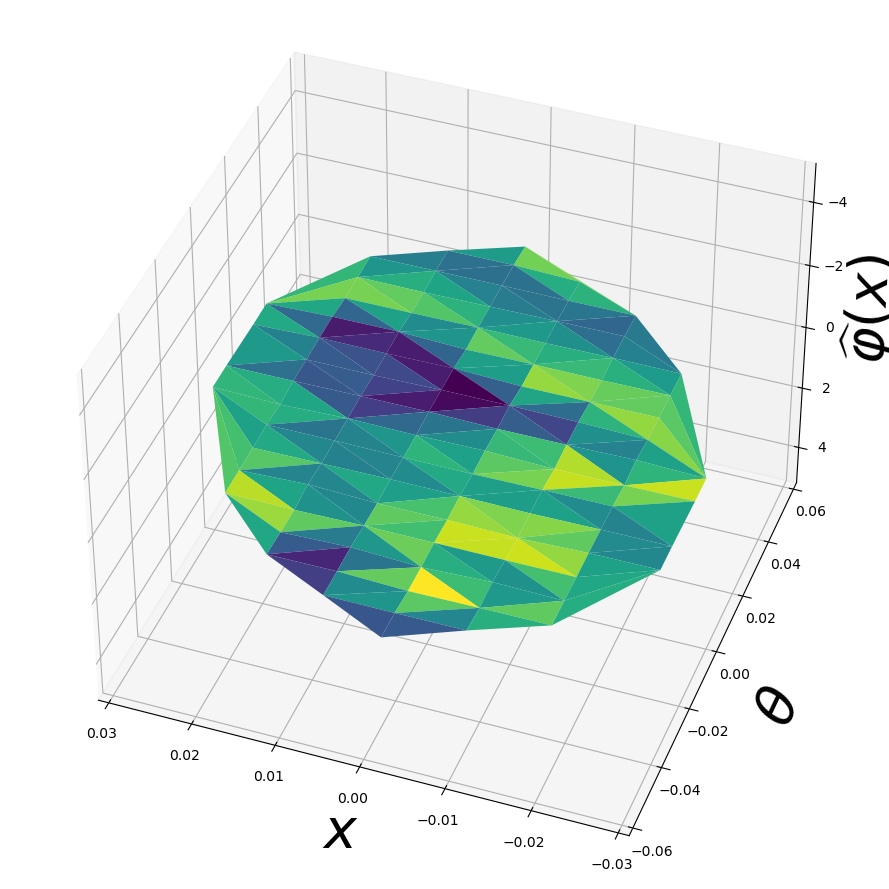

In [32]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.rcParams["figure.figsize"] = [7.0, 7.0]
# plotting the points
ax.plot_trisurf(np_inside_ellipse[:, 0],np_inside_ellipse[:, 2], actual_feedback.reshape(np_inside_ellipse[:, 1].shape), cmap='viridis', edgecolor='none')
print(np.max(np_inside_ellipse[:, 0]), np.min(np_inside_ellipse[:, 2]))
print(np.max(np_inside_ellipse[:, 0]), np.min(np_inside_ellipse[:, 2]))
ax.set_zlabel(r'$\widehat{\varphi}(x)$', rotation = 0, fontsize = 40, labelpad = 10)
ax.set_xlabel(r'$x$', fontsize = 40,labelpad=10)
ax.set_ylabel(r'$\theta$', fontsize = 40,labelpad= 20)

ax.view_init(-140, 70)
ax.set_xlim(-0.03, 0.03)
ax.set_ylim(-0.06, 0.06)
ax.set_zlim(-5, 5)
plt.savefig('actual_feedback_2.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.02857142857142858 -0.06938775510204082
0.02857142857142858 -0.06938775510204082


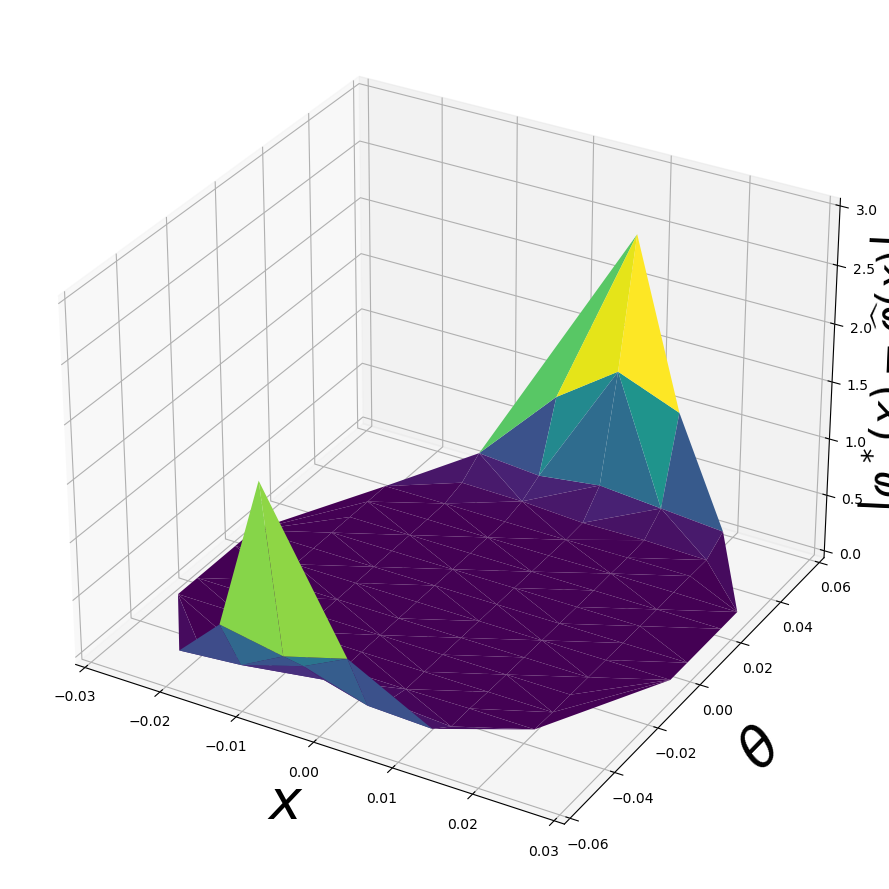

In [42]:
error = np.abs(quasi_feedback - np.squeeze(actual_feedback)).reshape(np_inside_ellipse[:, 0].shape)
fig = plt.figure()

ax = plt.axes(projection='3d')
plt.rcParams["figure.figsize"] = [9.0, 9.0]
# plotting the points
ax.plot_trisurf(np_inside_ellipse[:, 0],np_inside_ellipse[:, 2], error, cmap='viridis', edgecolor='none')
print(np.max(np_inside_ellipse[:, 0]), np.min(np_inside_ellipse[:, 2]))
print(np.max(np_inside_ellipse[:, 0]), np.min(np_inside_ellipse[:, 2]))
ax.set_zlabel(r'$\left|\varphi^*(x)-\widehat{\varphi}(x)\right|$', rotation = 0, fontsize = 30, labelpad = 10)
ax.set_xlabel(r'$x$', fontsize = 40,labelpad=10)
ax.set_ylabel(r'$\theta$', fontsize = 40,labelpad= 20)

ax.set_xlim(-0.03, 0.03)
ax.set_ylim(-0.06, 0.06)
ax.set_zlim(0, 3e-7)
plt.savefig('error1.eps', format='eps')


In [ ]:
error = np.abs(quasi_feedback - np.squeeze(actual_feedback)).reshape(np_inside_ellipse[:, 0].shape)
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.rcParams["figure.figsize"] = [9.0, 9.0]
# plotting the points
ax.plot_trisurf(np_inside_ellipse[:, 1],np_inside_ellipse[:, 3], error, cmap='viridis', edgecolor='none')
# print(np.max(np_inside_ellipse[:, 0]), np.min(np_inside_ellipse[:, 2]))
# print(np.max(np_inside_ellipse[:, 0]), np.min(np_inside_ellipse[:, 2]))
ax.set_zlabel(r'$\left|\varphi^*(x)-\widehat{\varphi}(x)\right|$', rotation = 0, fontsize = 30, labelpad = 10)
ax.set_xlabel(r'$\dot{x}$', fontsize = 40,labelpad=20)
ax.set_ylabel(r'$\dot{\theta}$', fontsize = 40,labelpad= 20)

ax.set_xlim(-0.05, 0.05)
ax.set_ylim(-0.4, 0.4)
ax.set_zlim(0, 3e-7)
plt.savefig('error2.eps', format='eps')
plt.show()